### MMDetection 설치
* 강의 영상에는 pip install mmcv-full로 mmcv를 설치(약 10분 정도의 시간이 소요)
* 실습코드는 pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html 로 변경(설치에 12초 정도 걸림). 

In [1]:
import torch
print(torch.__version__)

1.10.0+cu111


In [2]:
# https://mmcv.readthedocs.io/en/latest/get_started/installation.html 설치 과정 참조.
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
fatal: destination path 'mmdetection' already exists and is not an empty directory.
running install
running bdist_egg
running egg_info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'mmdet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mmdet
creating build/bdist.linux-x86_64/egg/mmdet/utils
copying build/lib/mmdet/utils/misc.py -> build/bdist.linux-x86_64/egg/mmdet/utils
copying build/lib/mmdet/utils/logger.py -> build/bdist.linux-x86_64/egg/mmdet/utils
copying build/lib/mmdet/utils/contextmanagers.py -> build/bdi

In [3]:
# 아래를 수행하기 전에 kernel을 restart 해야 함. 
from mmdet.apis import init_detector, inference_detector
import mmcv

In [4]:
import torch

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.10.0+cu111 (Tesla P100-PCIE-16GB)


### MS-COCO 데이터 기반으로 Mask RCNN Pretrained 모델을 활용하여 Inference 수행
* Mask RCNN Pretrained 모델 다운로드
* Mask RCNN용 Config 파일 설정.  
* Inference 용 모델을 생성하고, Inference 적용

In [5]:
# pretrained weight 모델을 다운로드 받기 위해서 mmdetection/checkpoints 디렉토리를 만듬. 
!cd mmdetection; mkdir checkpoints

In [6]:
!wget -O /content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r101_fpn_1x_coco/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth

--2022-03-17 05:32:02--  http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r101_fpn_1x_coco/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.72
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.72|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254089599 (242M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth’

/content/mmdetectio 100%[===================>] 242.32M  7.75MB/s    in 31s     

2022-03-17 05:32:34 (7.72 MB/s) - ‘/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth’ saved [254089599/254089599]



In [7]:
!ls -lia /content/mmdetection/checkpoints

total 248144
5246640 drwxr-xr-x  2 root root      4096 Mar 17 05:32 .
5242886 drwxr-xr-x 19 root root      4096 Mar 17 05:31 ..
5246641 -rw-r--r--  1 root root 254089599 Nov  2 16:37 mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth


In [8]:
# config 파일을 설정하고, 다운로드 받은 pretrained 모델을 checkpoint로 설정. 
config_file = '/content/mmdetection/configs/mask_rcnn/mask_rcnn_r101_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth'

In [9]:
# config 파일과 pretrained 모델을 기반으로 Detector 모델을 생성. 
from mmdet.apis import init_detector, inference_detector

# init_detector :: config와 pretrained 인자로 넣으면 pretrained된 모델을 config대로 detector형 모델을 쫙 만들어줌
model = init_detector(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: /content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth


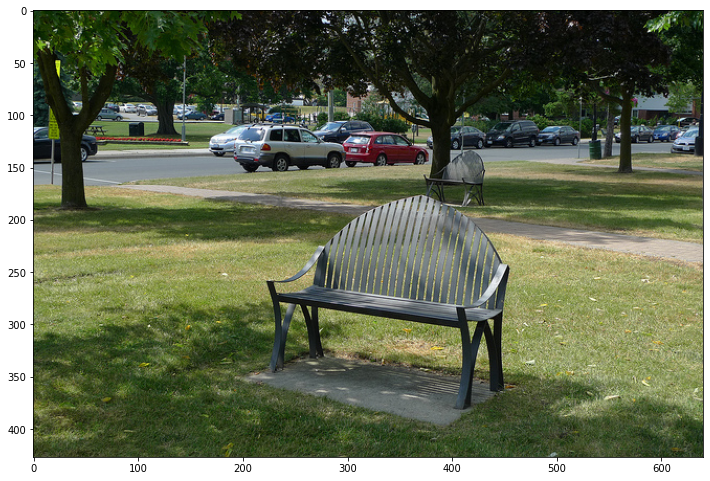

In [10]:
import cv2
import matplotlib.pyplot as plt
img = '/content/mmdetection/demo/demo.jpg'

img_arr  = cv2.imread(img)
img_arr_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_arr_rgb)

In [11]:
img_path = '/content/mmdetection/demo/demo.jpg'

# inference_detector의 인자로 string(file경로), ndarray가 단일 또는 list형태로 입력 될 수 있음. 
results = inference_detector(model, img_arr) # BGR로 되어 있는 이미지를 넣어야 함.

/usr/local/lib/python3.7/dist-packages/mmdet-2.22.0-py3.7.egg/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


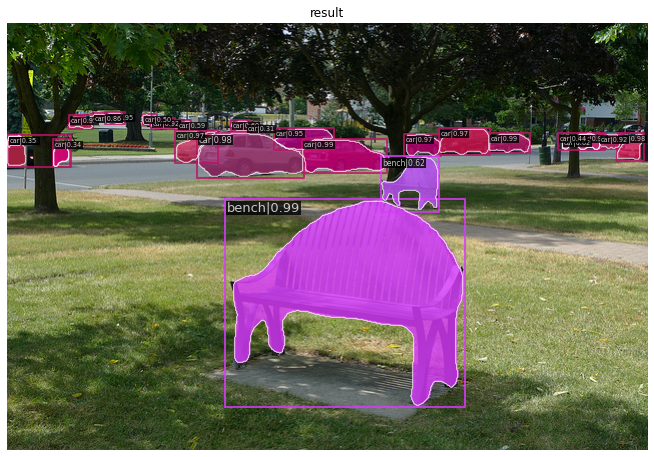

In [12]:
from mmdet.apis import show_result_pyplot

# inference 된 결과를 원본 이미지에 적용하여 새로운 image로 생성(bbox 처리된 image)
# Default로 score threshold가 0.3 이상인 Object들만 시각화 적용. show_result_pyplot은 model.show_result()를 호출. 
show_result_pyplot(model, img_arr, results)

### Inference 결과로 반환되는 results 값 살펴 보기
* inference_detector(model, img_path)의 결과로 반환되는 값은 instance segmentation 일 경우 Object Detection 결과에 추가되어 segmentation masking 정보도 함께 반환됨

In [13]:
type(results), len(results)

(tuple, 2)

In [14]:
results[0]

[array([[5.3380640e+02, 1.0804523e+02, 5.4053583e+02, 1.2511749e+02,
         9.9973656e-02]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[4.81508270e+02, 1.10576378e+02, 5.22668701e+02, 1.30030945e+02,
         9.90980089e-01],
        [2.94944916e+02, 1.16492393e+02, 3.79828735e+02, 1.50493484e+02,
         9.89214838e-01],
        [6.09770691e+02, 1.10475830e+02, 6.36041443e+02, 1.38237396e+02,
         9.83308971e-01],
        [1.84219271e-01, 1.12309654e+02, 6.32011337e+01, 1.44734024e+02,
         9.83204901e-01],
        [1.89931061e+02, 1.10189613e+02, 2.96254059e+02, 1.55370819e+02,
         9.80140746e-01],
        [4.31934601e+02, 1.05915459e+02, 4.82009277e+02, 1.32418304e+02,
         9.71464217e-01],
        [1.67749054e+02, 1.07459709e+02, 2.10424194e+02, 1.40552200e+02,
         9.65439916e-01],
        [3.96333069e+02, 1.11172188e+02, 4.33640717e+02, 1.33290237e+02,
         9.65018332e-01],
        [5.70615112e+02, 1.10114746e+02, 5.92991272e+02,

In [15]:
# Tuple 안에 bbox 정보 + masking 정보가 들어가있음
# masking 정보가 들어있는 array가 이미지 크기 형태로 되어있음
results

([array([[5.3380640e+02, 1.0804523e+02, 5.4053583e+02, 1.2511749e+02,
          9.9973656e-02]], dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([[4.81508270e+02, 1.10576378e+02, 5.22668701e+02, 1.30030945e+02,
          9.90980089e-01],
         [2.94944916e+02, 1.16492393e+02, 3.79828735e+02, 1.50493484e+02,
          9.89214838e-01],
         [6.09770691e+02, 1.10475830e+02, 6.36041443e+02, 1.38237396e+02,
          9.83308971e-01],
         [1.84219271e-01, 1.12309654e+02, 6.32011337e+01, 1.44734024e+02,
          9.83204901e-01],
         [1.89931061e+02, 1.10189613e+02, 2.96254059e+02, 1.55370819e+02,
          9.80140746e-01],
         [4.31934601e+02, 1.05915459e+02, 4.82009277e+02, 1.32418304e+02,
          9.71464217e-01],
         [1.67749054e+02, 1.07459709e+02, 2.10424194e+02, 1.40552200e+02,
          9.65439916e-01],
         [3.96333069e+02, 1.11172188e+02, 4.33640717e+02, 1.33290237e+02,
          9.65018332e-01],
         [5.70615112e+02, 1.10114746e

In [16]:
# results[0] :: bbox 정보
# results[1] :: masking 정보

print(type(results[0]), len(results[0]), type(results[1]), len(results[1]) )

<class 'list'> 80 <class 'list'> 80


In [17]:
'''results[0]는 list형으로 coco class의  0부터 79까지 class_id별로 80개의 array를 가짐. 
개별 array들은 각 클래스별로 5개의 값(좌표값과 class별로 confidence)을 가짐. 개별 class별로 여러개의 좌표를 가지면 여러개의 array가 생성됨. 
좌표는 좌상단(xmin, ymin), 우하단(xmax, ymax) 기준. 
개별 array의 shape는 (Detection된 object들의 수, 5(좌표와 confidence)) 임
'''

# results[0][0] :: bbox 정보의 첫 번째 nd.array
print(type(results[0][0]), results[0][0].shape, results[0][1].shape, results[0][2].shape)

<class 'numpy.ndarray'> (1, 5) (0, 5) (45, 5)


In [18]:
# results[1]은 masking 정보를 가짐. coco class의  0부터 79까지 class_id 별로 80개의 list를 가짐. 개별 list는 개별 object의 mask 정보를 내부 원소로 가짐. 
# 개별 object의 mask 정보는 2차원 array로서 image의 height x width 형태를 가짐. 
# list로 나오는데 그 안의 요소가 몇 개가 있느냐! 그거에 따라서 obj에 대한 masking 정보가 주어짐
# --> 그 정보가 2차원 nd.array로 주어짐


print('results[1]의 첫번째 원소의 type과 size:', type(results[1][0]), len(results[1][0]), '두번째 원소 사이즈:', len(results[1][1]), '세번째 원소 사이즈:', len(results[1][2]))
print('results[1]의 첫번째 원소 list의 첫번째 원소 type과 shape:', type(results[1][0][0]), results[1][0][0].shape) # shape : 이미지 사이즈
#print('results[1]의 두번째 원소 list의 첫번째 원소 type과 shape:', type(results[1][1][0]))
print('results[1]의 세번째 원소 list의 첫번째/두번째/세번째 원소 shape:', results[1][2][0].shape, results[1][2][1].shape, results[1][2][2].shape)
print('image shape:', img_arr.shape)

results[1]의 첫번째 원소의 type과 size: <class 'list'> 1 두번째 원소 사이즈: 0 세번째 원소 사이즈: 45
results[1]의 첫번째 원소 list의 첫번째 원소 type과 shape: <class 'numpy.ndarray'> (427, 640)
results[1]의 세번째 원소 list의 첫번째/두번째/세번째 원소 shape: (427, 640) (427, 640) (427, 640)
image shape: (427, 640, 3)


In [19]:
# masing 첫 번째 리스트의 첫번째 리스트 원소
mask_imsi = results[1][0][0]
print(mask_imsi)
print(mask_imsi[mask_imsi > 0], mask_imsi[mask_imsi == 0])
print(mask_imsi[mask_imsi > 0].shape, mask_imsi[mask_imsi == 0].shape)


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True] [False False False ... False False False]
(72,) (273208,)


(-0.5, 639.5, 426.5, -0.5)

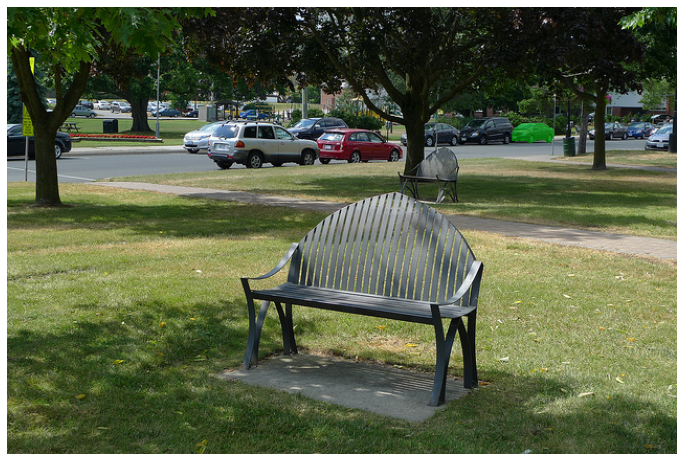

In [20]:
import numpy as np

def apply_mask(image, mask, color, alpha=0.5):

  for c in range(3):

    # mask값이 1일 경우는 원본 pixel값에 컬러 segmentation을 적용하고, 그렇지 않을 경우 원본 pixel값을 그대로 유지. 
    image[:, :, c] = np.where(mask == 1, #  mask가 1이면
                              image[:, :, c] * # 채널별로 루프를 돌면서 
                              (1 - alpha) + alpha * color[c] * 255, # 값을 덧씌우는
                              image[:, :, c]) # mask가 1이 아닌 경우는 원본 이미지 그대로 가져감
  return image


draw_img = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
                                  # results[1][2][0] :: masking 정보 중 3번째에 해당되는 값
masked_image = apply_mask(draw_img, results[1][2][0], (0, 255, 0), alpha=0.6)
plt.figure(figsize=(12, 14))
plt.imshow(masked_image)
plt.axis('off')

### Video Detection 실행
* mmdetection의 model.show_result()를 실행하여 frame별로 object detect 된 결과를 시각화 

In [21]:
!mkdir data

In [22]:
!wget -O /content/data/John_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2022-03-17 05:33:02--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4 [following]
--2022-03-17 05:33:02--  https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4 [following]
--2022-03-17 05:33:03--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.

In [23]:
# https://github.com/open-mmlab/mmdetection/blob/master/demo/video_demo.py 대로 video detection 수행. 
import cv2

video_reader = mmcv.VideoReader('/content/data/John_Wick_small.mp4') # ==  opencv.videocapture

# Formatting SEtting
video_writer = None
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter('/content/data/John_Wick_small_out1.mp4', fourcc, video_reader.fps,(video_reader.width, video_reader.height))

# iteration loop
for frame in mmcv.track_iter_progress(video_reader):
  result = inference_detector(model, frame) # result = tuple 형태
  frame = model.show_result(frame, result, score_thr=0.4) # model.show_result 함수에 resut가 튜플로 들어가면 masking까지 같이 해야된다고 인지 

  video_writer.write(frame)

if video_writer:
        video_writer.release()

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 2.7 task/s, elapsed: 22s, ETA:     0s


### segmentation 시각화 함수 직접 작성 후 단일 이미지와 Video inference 수행. 
- MMDetection/configs/mask-rcnn 문서에 R101-FPN을 쓰면 13.5 fps가 나온다고 했지만, video inference 시 시각화까지 동시에 진행하니깐 2.6 fps가 나옴. 그래서 inference와 시각화를 구별해보기로 함

In [24]:
# 0부터 순차적으로 클래스 매핑된 label 적용. 
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

colors = list(
    [[0, 255, 0],
     [0, 0, 255],
     [255, 0, 0],
     [0, 255, 255],
     [255, 255, 0],
     [255, 0, 255],
     [80, 70, 180],
     [250, 80, 190],
     [245, 145, 50],
     [70, 150, 250]] )

In [25]:
#mask threshold값은 test_cfg 내 mask_thr_binary=0.5 로 지정되어 있음. 
# pretty_text는 이쁘게 출력

print(model.cfg.pretty_text)

# roi_head에서 prediction 결과 끄집어냄

model = dict(
    type='MaskRCNN',
    backbone=dict(
        type='ResNet',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=None),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0),
        loss_bbox=dict(type='L1Loss', loss_weight=1.0

In [46]:
# model과 원본 이미지 array, filtering할 기준 class confidence score를 인자로 가지는 inference 시각화용 함수 생성. 
# 이미 inference 시 mask boolean값이 들어오므로 mask_threshold 값을 필요하지 않음. 
'''
 model : pretrained된 모델
 img_array : 원본 이미지 array 
 mask_threshold는 빠짐 
 --> 현재 masking 확률값이 들어가있는 게 아니라 True, False로 들어가있기 때문에 threshold가 필요없음
 --> 여기서 mask_threshold는 mmdetection config내에 들어가있음    
 '''
def get_detected_img(model, img_array,  score_threshold=0.3, is_print=True):

 
  # 인자로 들어온 image_array를 복사. 
  draw_img = img_array.copy()
  bbox_color=(0, 255, 0)
  text_color=(0, 0, 255)

  # model과 image array를 입력 인자로 inference detection 수행하고 결과를 results로 받음. 
  # results는 80개의 2차원 array(shape=(오브젝트갯수, 5))를 가지는 list. 
  results = inference_detector(model, img_array)
  bbox_results = results[0]
  seg_results = results[1]

  # 80개의 array원소를 가지는 results 리스트를 loop를 돌면서 개별 2차원 array들을 추출하고 이를 기반으로 이미지 시각화 
  # results 리스트의 위치 index가 바로 COCO 매핑된 Class id. 여기서는 result_ind가 class id
  # 개별 2차원 array에 오브젝트별 좌표와 class confidence score 값을 가짐. 
  for result_ind, bbox_result in enumerate(bbox_results): # bbox_results는 80개는 무조건 가지고 있음 --> COCO니깐


    # 그리고 개별 요소들은 2차원 array임  
    # 개별 2차원 array의 row size가 0 이면 해당 Class id로 값이 없으므로 다음 loop로 진행. 
    if len(bbox_result) == 0:
      continue
    
    mask_array_list = seg_results[result_ind]
    
    # 해당 클래스 별로 Detect된 여러개의 오브젝트 정보가 2차원 array에 담겨 있으며, 이 2차원 array를 row수만큼 iteration해서 개별 오브젝트의 좌표값 추출. 
    for i in range(len(bbox_result)): # len(bbox_result) :: 2차원
      
      # 좌상단, 우하단 좌표 추출. 
      # box의 confidence score가 score_threshold보다 크면
      if bbox_result[i, 4] > score_threshold:
        left = int(bbox_result[i, 0])
        top = int(bbox_result[i, 1])
        right = int(bbox_result[i, 2])
        bottom = int(bbox_result[i, 3])
        caption = "{}: {:.4f}".format(labels_to_names_seq[result_ind], bbox_result[i, 4])
        cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
        cv2.putText(draw_img, caption, (int(left), int(top - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.37, text_color, 1)
       
        # masking 시각화 적용. class_mask_array는 image 크기 shape의  True/False값을 가지는 2차원 array
        class_mask_array = mask_array_list[i]
       
        # 원본 image array에서 mask가 True인 영역만 별도 추출. 
        masked_roi = draw_img[class_mask_array]
        
        #color를 임의 지정
        color_index = np.random.randint(0, len(colors)-1)
        
        # color를 class별로 지정
        # --> color_index = result_ind % len(colors)
        # color_index = result_ind % len(colors)
        color = colors[color_index]
        
        # apply_mask()함수를 적용시 수행 시간이 상대적으로 오래 걸림. 
        #draw_img = apply_mask(draw_img, class_mask_array, color, alpha=0.4)
        # 원본 이미지의 masking 될 영역에 mask를 특정 투명 컬러로 적용
        draw_img[class_mask_array] = ([0.3*color[0], 0.3*color[1], 0.3*color[2]] + 0.6 * masked_roi).astype(np.uint8)
        if is_print:
          print(caption)
  
  return draw_img


In [41]:
img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')
mask_array = results[1][2][0] # [1] : masking 정보 / [2] : index 2 (class id) - 3번째 / [0] : 첫 번째 masking 정보

print('image array shape:', img_arr.shape)
print('mask array shape:', mask_array.shape)
print('mask true array shape:', mask_array[mask_array].shape)
print('masked array shape:', img_arr[results[1][2][0]].shape)


image array shape: (427, 640, 3)
mask array shape: (427, 640)
mask true array shape: (628,)
masked array shape: (628, 3)


car: 0.9910
car: 0.9892
car: 0.9833
car: 0.9832
car: 0.9801
car: 0.9715
car: 0.9654
car: 0.9650
car: 0.9546
car: 0.9531
car: 0.9524
car: 0.9464
car: 0.9209
car: 0.9160
car: 0.8646
car: 0.6161
car: 0.5985
car: 0.5947
car: 0.5020
car: 0.4424
car: 0.3456
car: 0.3411
car: 0.3080
bench: 0.9872
bench: 0.6239


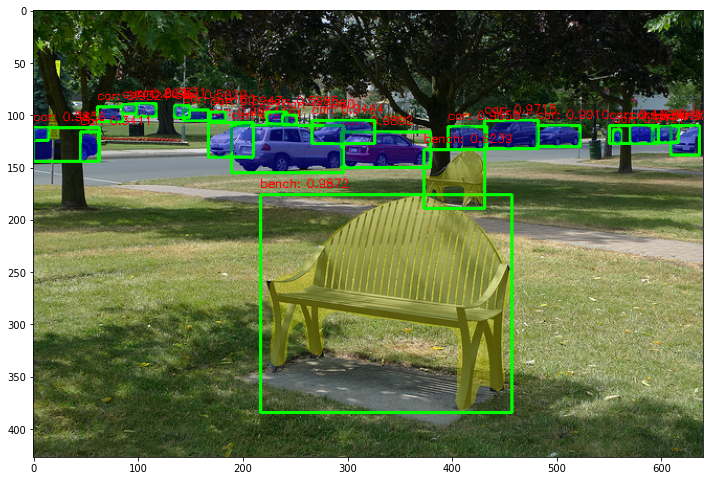

In [45]:
import matplotlib.pyplot as plt

img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')
detected_img = get_detected_img(model, img_arr,  score_threshold=0.3, is_print=True)

# detect 입력된 이미지는 bgr임. 이를 최종 출력시 rgb로 변환 
detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(detected_img)

In [47]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2022-03-17 06:00:55--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.03s   

2022-03-17 06:00:55 (14.0 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



person: 0.9992
person: 0.9991
person: 0.9980
person: 0.9974
person: 0.9378
car: 0.9596
car: 0.9578
car: 0.9487
car: 0.9288
car: 0.9221
car: 0.8884
car: 0.8715
car: 0.8034
car: 0.7781
car: 0.4521
car: 0.3580
car: 0.3103
truck: 0.3594
truck: 0.3297
tie: 0.5624
tie: 0.3392


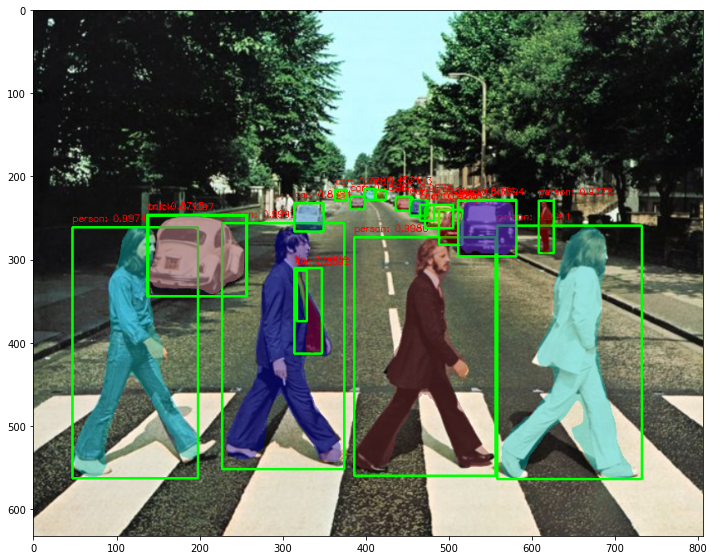

In [48]:
import matplotlib.pyplot as plt

img_arr = cv2.imread('/content/data/beatles01.jpg')
detected_img = get_detected_img(model, img_arr,  score_threshold=0.3, is_print=True)

# detect 입력된 이미지는 bgr임. 이를 최종 출력시 rgb로 변환 
detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(detected_img)

In [49]:
import time

def do_detected_video(model, input_path, output_path, score_threshold, do_print=True):
    
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt)
    btime = time.time()

    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        stime = time.time()
        img_frame = get_detected_img(model, img_frame,  score_threshold=score_threshold,is_print=False)
        
        if do_print:
          print('frame별 detection 수행 시간:', round(time.time() - stime, 4))
        vid_writer.write(img_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

    print('최종 detection 완료 수행 시간:', round(time.time() - btime, 4))

In [50]:
do_detected_video(model, '/content/data/John_Wick_small.mp4', '/content/data/John_Wick_small_out2.mp4', score_threshold=0.4, do_print=True)

총 Frame 갯수: 58
frame별 detection 수행 시간: 0.1511
frame별 detection 수행 시간: 0.1441
frame별 detection 수행 시간: 0.1539
frame별 detection 수행 시간: 0.1663
frame별 detection 수행 시간: 0.1772
frame별 detection 수행 시간: 0.1741
frame별 detection 수행 시간: 0.1656
frame별 detection 수행 시간: 0.1649
frame별 detection 수행 시간: 0.1686
frame별 detection 수행 시간: 0.1893
frame별 detection 수행 시간: 0.155
frame별 detection 수행 시간: 0.1708
frame별 detection 수행 시간: 0.1648
frame별 detection 수행 시간: 0.1667
frame별 detection 수행 시간: 0.1611
frame별 detection 수행 시간: 0.1575
frame별 detection 수행 시간: 0.1537
frame별 detection 수행 시간: 0.16
frame별 detection 수행 시간: 0.1613
frame별 detection 수행 시간: 0.1653
frame별 detection 수행 시간: 0.1754
frame별 detection 수행 시간: 0.1703
frame별 detection 수행 시간: 0.1723
frame별 detection 수행 시간: 0.1608
frame별 detection 수행 시간: 0.1597
frame별 detection 수행 시간: 0.1741
frame별 detection 수행 시간: 0.1639
frame별 detection 수행 시간: 0.169
frame별 detection 수행 시간: 0.1609
frame별 detection 수행 시간: 0.1601
frame별 detection 수행 시간: 0.1593
frame별 detection 수행 시간: 0.16